# SOME-TOOLS for waveforms plots
------------------------------------
Small tutorial for trace-plotting routines with `some_tools` package and PyGMT library.
First of all let's set up the imports

In [1]:
%matplotlib inline
#
from obspy import read, UTCDateTime
#
import some_tools
from some_tools import plot_pygmt as SPL
# 
print("SOME-tools version:  %s" % some_tools.__version__)

SOME-tools version:  0.0.4


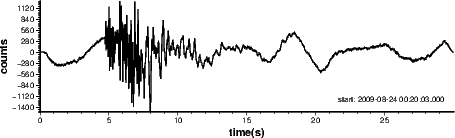

In [2]:
st = read()
tr = st[0]
SPL.obspyTrace2GMT(tr)  # this will print it on screen with your default PDF viewer
SPL.obspyTrace2GMT(tr, store_name="obtr_test.png", show=False)  # this will store a PDF
SPL.obspyTrace2GMT(tr, store_name="obtr_test.pdf", show=False)  # this will store a PNG

If you have some time series to show, they must be specified as a list of tuple:
```
picklist = [
    ( UTCDateTime, matplotlibDict{}), ...
    ]
```

and add to the `trace.stats` dictionary attributes as `timemarks` (see cell below).

The matplotlib dictionary must contain the following keys: `ms` (markersize of the bar),  `color` (the pick color).
Optional, though recommended, are: `label` (if you want to label or name the legend)

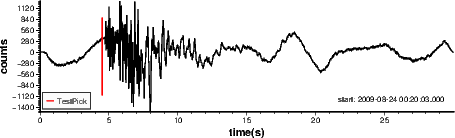

In [3]:
picktime = UTCDateTime("2009-08-24 00:20:07.5")
picklist = [
    ( picktime, {'ms': 1.5, 'color': 'red', 'label': 'TestPick'}),
    ]
#
tr.stats.timemarks = picklist
SPL.obspyTrace2GMT(tr, plot_time_marks=True)  # this will print it on screen with your default PDF viewer

If you like to preprocess the stream, use the private `_miniprocess` function.
NB: Being it provate it should not be called directly. Rahter it will be set / call by configuration scripts. Her is just for show

Please note that the X and Y-axis tick-marks intervals are set automatically by the function. If you want to specify them:
 - `big_x_tick_interval`: refers to the `-Bxa` GMT value
 - `small_x_tick_interval`: refers to the `-Bxf` GMT value 
 - `big_y_tick_interval`: refers to the `-Bya` GMT value
 - `small_y_tick_interval`: refers to the `-Byf` GMT value 
 
 Otherwise the function itself will find the proper spacing **automatically**!! Like below

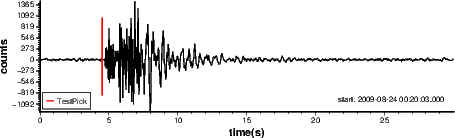

In [4]:
SPL.obspyTrace2GMT(SPL._miniprocess(tr, override=False), #override is pretty straightforward ... 
                   plot_time_marks=True, show=True)

... or by specifying it directly.

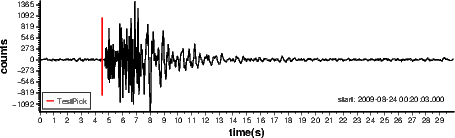

In [5]:
SPL.obspyTrace2GMT(SPL._miniprocess(tr, override=False), #override is pretty straightforward ... 
                   plot_time_marks=True, big_x_tick_interval=1, small_x_tick_interval=0.5,
                   show=True)